In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin as pg
from statsmodels.stats.anova import AnovaRM

**Original Situation**

In [2]:
df0 = pd.read_csv('../Simulaties/Validation4.csv', skiprows=16)
df0 = df0.drop(labels='[all run data]', axis=1)
df0

C:\Users\Julian El-Fasih\anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
C:\Users\Julian El-Fasih\anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


,count monkeys,count monkeys.1,count monkeys.2,count monkeys.3,count monkeys.4,count monkeys.5,count monkeys.6,count monkeys.7,count monkeys.8,count monkeys.9,...,count monkeys.990,count monkeys.991,count monkeys.992,count monkeys.993,count monkeys.994,count monkeys.995,count monkeys.996,count monkeys.997,count monkeys.998,count monkeys.999
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,101,100,100,100,100,100,100,101
2,100,100,100,100,100,100,100,100,101,100,...,100,100,101,100,100,100,100,100,100,101
3,100,100,100,100,100,100,100,100,101,100,...,100,100,101,100,100,100,100,100,100,101
4,100,100,100,100,100,100,100,100,101,100,...,101,100,101,100,100,100,100,100,100,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,14,21,15,19,23,24,17,11,19,10,...,23,24,16,11,16,36,20,18,19,34
8762,14,21,15,19,23,24,17,11,19,10,...,23,24,16,11,16,36,20,18,19,34
8763,14,21,15,19,23,24,17,11,19,10,...,23,24,16,11,16,36,20,18,19,34
8764,14,21,15,19,23,24,17,11,19,10,...,23,24,16,11,16,36,20,18,19,34


Text(0.5, 0, 'Time (days)')

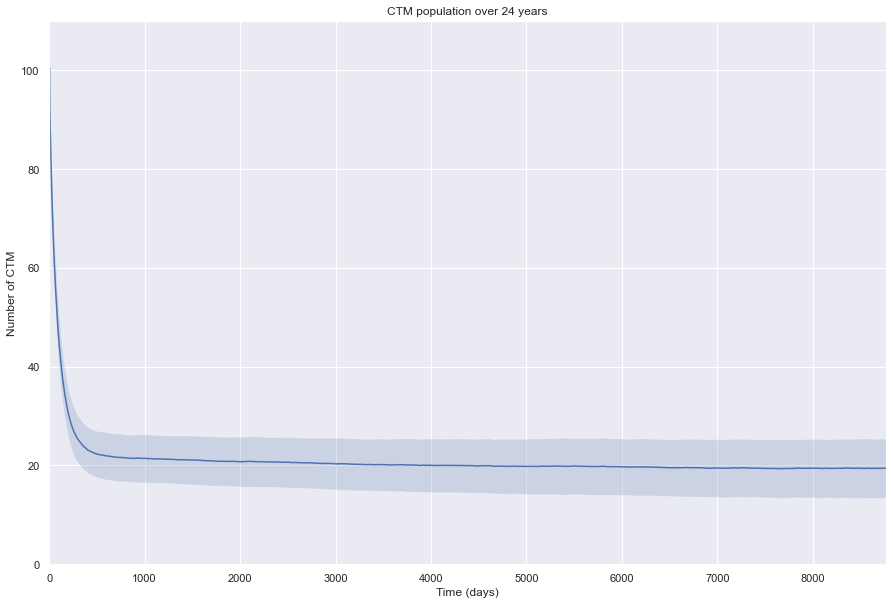

In [54]:
mean0 = df0.mean(axis=1)
std0 = df0.std(axis=1)
sns.set(rc={'figure.figsize':(15,10)})
plt.plot(mean0)
plt.fill_between(df0.index, mean0 + std0, mean0 - std0, alpha=0.2)
plt.axis([0,8766, 0, 110])
plt.title('CTM population over 24 years')
plt.ylabel('Number of CTM')
plt.xlabel('Time (days)')

**HPH Measure 1**

In [4]:
df1 = pd.read_csv('HPH2.csv', skiprows=16)
df1 = df1.drop(labels='[all run data]', axis=1)
df1

,count monkeys,count monkeys.1,count monkeys.2,count monkeys.3,count monkeys.4,count monkeys.5,count monkeys.6,count monkeys.7,count monkeys.8,count monkeys.9,...,count monkeys.990,count monkeys.991,count monkeys.992,count monkeys.993,count monkeys.994,count monkeys.995,count monkeys.996,count monkeys.997,count monkeys.998,count monkeys.999
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,101,100,100,100,101,100,100,...,100,101,100,100,101,100,100,100,100,100
2,100,100,100,101,100,100,100,101,100,100,...,100,101,100,100,101,100,100,100,100,101
3,100,100,100,101,100,100,100,101,100,100,...,100,101,100,102,101,100,101,100,100,101
4,100,100,100,101,100,100,101,101,100,100,...,100,101,100,102,101,100,101,100,100,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,29,18,22,25,16,40,24,17,21,16,...,25,18,29,25,26,19,25,15,19,35
8762,29,18,22,25,16,40,24,17,21,16,...,25,18,30,25,26,19,25,15,19,35
8763,29,18,22,25,16,40,24,17,21,16,...,25,18,30,25,26,19,25,15,19,35
8764,29,18,22,25,16,40,24,17,21,16,...,25,18,30,25,26,19,25,15,19,35


Text(0.5, 0, 'Time (days)')

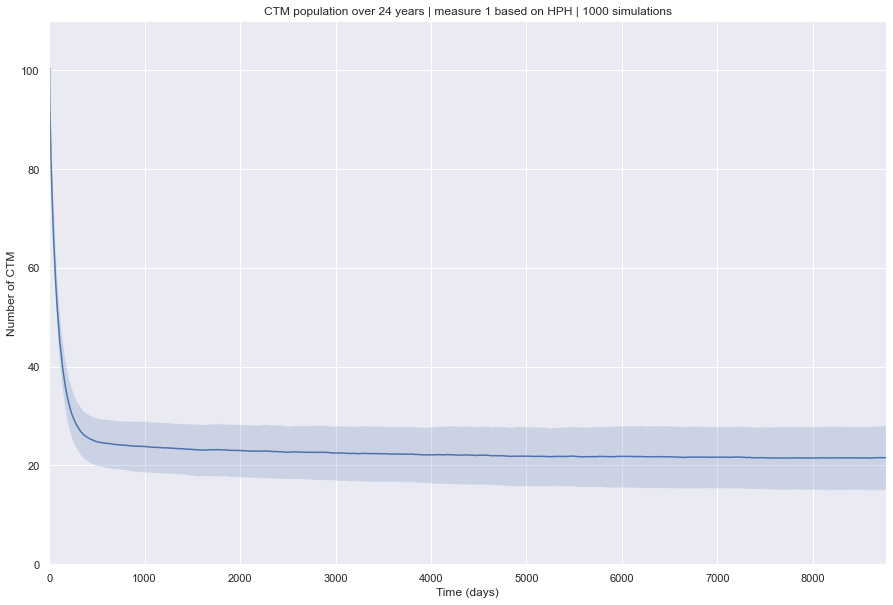

In [55]:
mean1 = df1.mean(axis=1)
std1 = df1.std(axis=1)
sns.set(rc={'figure.figsize':(15,10)})
plt.plot(mean1)
plt.fill_between(df1.index, mean1 + std1, mean1 - std1, alpha=0.2)
plt.axis([0,8766, 0, 110])
plt.title('CTM population over 24 years | measure 1 based on HPH | 1000 simulations')
plt.ylabel('Number of CTM')
plt.xlabel('Time (days)')

**HAH Measure 1**

In [6]:
df2 = pd.read_csv('HAH1.csv', skiprows=16)
df2 = df2.drop(labels='[all run data]', axis=1)
df2

,count monkeys,count monkeys.1,count monkeys.2,count monkeys.3,count monkeys.4,count monkeys.5,count monkeys.6,count monkeys.7,count monkeys.8,count monkeys.9,...,count monkeys.990,count monkeys.991,count monkeys.992,count monkeys.993,count monkeys.994,count monkeys.995,count monkeys.996,count monkeys.997,count monkeys.998,count monkeys.999
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,101,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,101,101,101,100,100,100,101,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,101,101,101,100,100,100,101,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,101,101,101,100,100,100,101,100,100,...,100,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,24,21,21,8,27,9,22,23,20,29,...,19,27,23,28,34,19,25,24,25,14
8762,24,21,21,8,27,9,22,23,20,29,...,19,27,23,28,34,19,25,24,25,14
8763,24,21,21,8,27,9,22,23,20,29,...,19,27,23,28,33,19,25,24,25,14
8764,24,21,21,8,27,9,22,23,20,29,...,19,27,23,28,33,19,25,24,25,14


Text(0.5, 0, 'Time (days)')

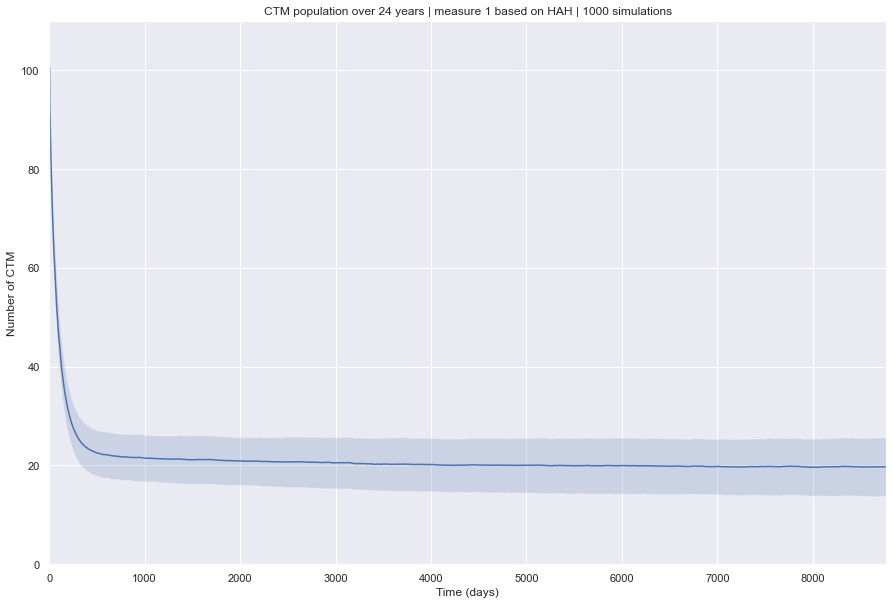

In [56]:
mean2 = df2.mean(axis=1)
std2 = df2.std(axis=1)
sns.set(rc={'figure.figsize':(15,10)})
plt.plot(mean2)
plt.fill_between(df2.index, mean2 + std2, mean2 - std2, alpha=0.2)
plt.axis([0,8766, 0, 110])
plt.title('CTM population over 24 years | measure 1 based on HAH | 1000 simulations')
plt.ylabel('Number of CTM')
plt.xlabel('Time (days)')

**Overview plot set 1**

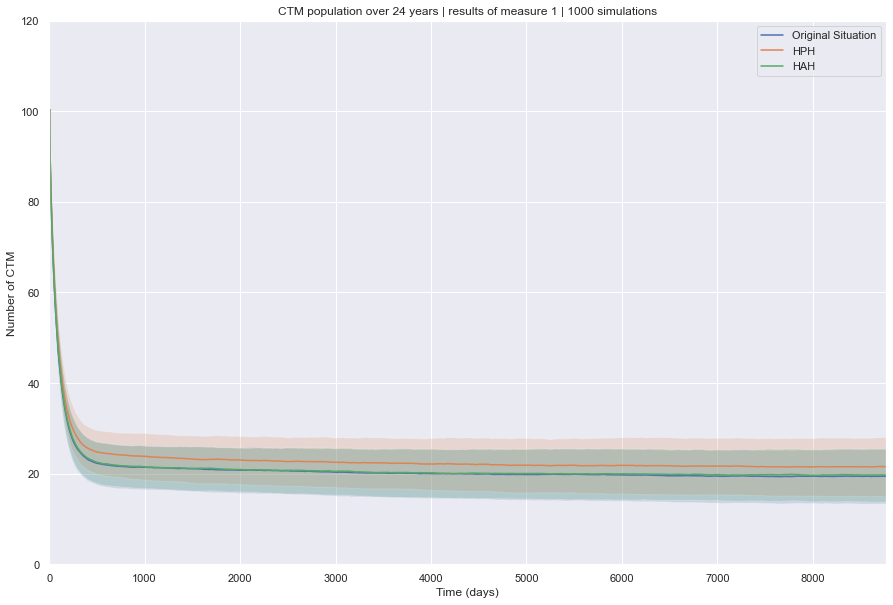

In [57]:
plt.plot(mean0, label='Original Situation')
plt.plot(mean1, label='HPH')
plt.plot(mean2, label='HAH')
plt.fill_between(df0.index, mean0 + std0, mean0 - std0, alpha=0.2)
plt.fill_between(df1.index, mean1 + std1, mean1 - std1, alpha=0.2)
plt.fill_between(df2.index, mean2 + std2, mean2 - std2, alpha=0.2)

plt.axis([0,8766, 0, 120])
plt.title('CTM population over 24 years | results of measure 1 | 1000 simulations')
plt.ylabel('Number of CTM')
plt.xlabel('Time (days)')
plt.legend()

**Test of sphericity**

In [9]:
# HPH vs HAH
df_stat1 = pd.Series(zip(mean1[1000:], mean2[1000:]))
df_stat1 = pd.DataFrame(df_stat1.values.tolist())
df_stat1 = df_stat1.stack().reset_index(drop=True)
df_stat1 = pd.DataFrame({'timestep': np.repeat(np.arange(0, 7766), 2), 'theory': np.tile(['HPH', 'HAH'], 7766), 'population': df_stat1})
pg.sphericity(df_stat1, dv='population', within='theory', subject='timestep')

(True, nan, nan, 1, 1.0)

In [10]:
# HAH vs Original
df_stat2 = pd.Series(zip(mean2[1000:], mean0[1000:]))
df_stat2 = pd.DataFrame(df_stat2.values.tolist())
df_stat2 = df_stat2.stack().reset_index(drop=True)
df_stat2 = pd.DataFrame({'timestep': np.repeat(np.arange(0, 7766), 2), 'theory': np.tile(['HAH', 'Original'], 7766), 'population': df_stat2})
pg.sphericity(df_stat2, dv='population', within='theory', subject='timestep')

(True, nan, nan, 1, 1.0)

In [11]:
# HPH vs Original
df_stat3 = pd.Series(zip(mean1[1000:], mean0[1000:]))
df_stat3 = pd.DataFrame(df_stat3.values.tolist())
df_stat3 = df_stat3.stack().reset_index(drop=True)
df_stat3 = pd.DataFrame({'timestep': np.repeat(np.arange(0, 7766), 2), 'theory': np.tile(['HPH', 'Original'], 7766), 'population': df_stat3})
pg.sphericity(df_stat3, dv='population', within='theory', subject='timestep')

(True, nan, nan, 1, 1.0)

**RMANOVA**

In [12]:
# HPH vs HAH
arm1 = AnovaRM(data=df_stat1, depvar='population', subject='timestep', within=['theory']).fit()
print(arm1)

                   Anova
         F Value    Num DF   Den DF  Pr > F
-------------------------------------------
theory 1630876.3605 1.0000 7765.0000 0.0000



In [13]:
# HAH vs Original
arm2 = AnovaRM(data=df_stat2, depvar='population', subject='timestep', within=['theory']).fit()
print(arm2)

                  Anova
        F Value   Num DF   Den DF  Pr > F
-----------------------------------------
theory 30923.1622 1.0000 7765.0000 0.0000



In [14]:
# HPH vs Original
arm3 = AnovaRM(data=df_stat3, depvar='population', subject='timestep', within=['theory']).fit()
print(arm3)

                   Anova
         F Value    Num DF   Den DF  Pr > F
-------------------------------------------
theory 4639192.8303 1.0000 7765.0000 0.0000



**Paired T-Test**

In [15]:
Original = df0.iloc[-1]
HPH = df1.iloc[-1]
HAH = df2.iloc[-1]

# is the population after HPH significantly greater than after HAH?
ttest1 = stats.ttest_rel(HPH, HAH, alternative='greater')
ttest1

Ttest_relResult(statistic=6.628903850474956, pvalue=2.7623900106378286e-11)

In [16]:
# is the population after HAH significantly greater than in the original situation?
ttest2 = stats.ttest_rel(HAH, Original, alternative='greater')
ttest2

Ttest_relResult(statistic=1.0621254391736112, pvalue=0.14421771542780484)

In [17]:
# is the population after HPH significantly greater than in the original situation?
ttest3 = stats.ttest_rel(HPH, Original, alternative='greater')
ttest3

Ttest_relResult(statistic=7.419043716488909, pvalue=1.2587577160498253e-13)

**HPH measure 2**

In [18]:
df4 = pd.read_csv('HPH_ED1.csv', skiprows=16)
df4 = df4.drop(labels='[all run data]', axis=1)
df4

,count monkeys,count monkeys.1,count monkeys.2,count monkeys.3,count monkeys.4,count monkeys.5,count monkeys.6,count monkeys.7,count monkeys.8,count monkeys.9,...,count monkeys.990,count monkeys.991,count monkeys.992,count monkeys.993,count monkeys.994,count monkeys.995,count monkeys.996,count monkeys.997,count monkeys.998,count monkeys.999
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,101,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,101,101,100,100,100,100,...,101,100,100,100,100,100,100,101,100,100
4,100,100,101,100,101,101,100,100,100,100,...,101,100,100,100,100,100,100,101,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,88,90,95,77,77,77,80,70,85,82,...,79,69,89,82,70,84,81,75,88,82
8762,88,90,95,77,77,77,80,70,85,82,...,79,69,89,82,70,84,81,75,88,82
8763,88,90,95,77,77,77,80,70,85,81,...,79,69,89,82,69,84,81,75,88,82
8764,88,90,95,77,77,77,80,70,85,81,...,79,69,89,82,69,84,81,75,88,82


Text(0.5, 0, 'Time (days)')

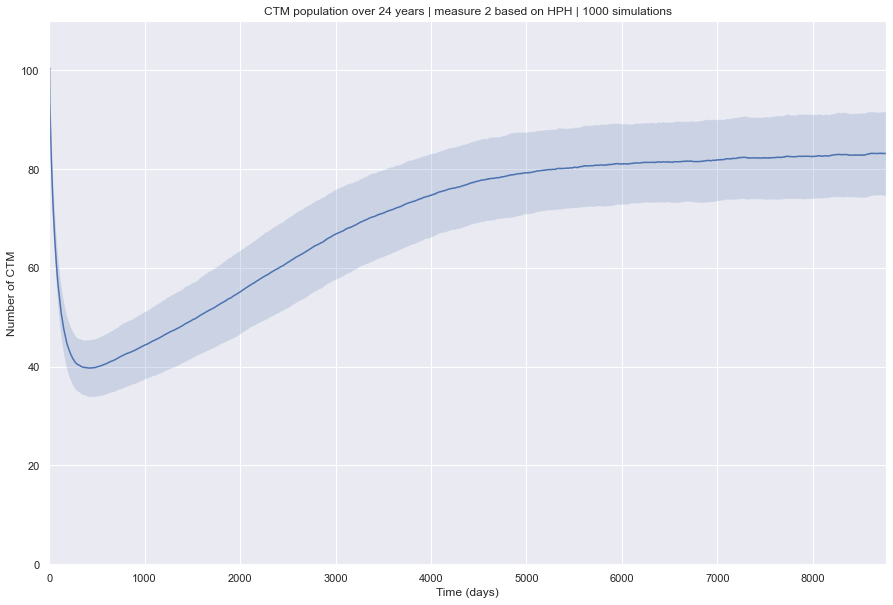

In [58]:
mean4 = df4.mean(axis=1)
std4 = df4.std(axis=1)
sns.set(rc={'figure.figsize':(15,10)})
plt.plot(mean4)
plt.fill_between(df4.index, mean4 + std4, mean4 - std4, alpha=0.2)
plt.axis([0,8766, 0, 110])
plt.title('CTM population over 24 years | measure 2 based on HPH | 1000 simulations')
plt.ylabel('Number of CTM')
plt.xlabel('Time (days)')

**HAH measure 2**

In [20]:
df5 = pd.read_csv('HAH_ED1.csv', skiprows=16)
df5 = df5.drop(labels='[all run data]', axis=1)
df5

,count monkeys,count monkeys.1,count monkeys.2,count monkeys.3,count monkeys.4,count monkeys.5,count monkeys.6,count monkeys.7,count monkeys.8,count monkeys.9,...,count monkeys.990,count monkeys.991,count monkeys.992,count monkeys.993,count monkeys.994,count monkeys.995,count monkeys.996,count monkeys.997,count monkeys.998,count monkeys.999
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,101,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,101,100,100,100,100,100,...,101,100,100,100,100,101,100,100,101,100
3,100,100,100,100,101,100,100,100,100,100,...,101,100,100,100,100,101,100,100,101,100
4,100,100,100,100,101,100,100,100,100,100,...,101,100,100,100,100,101,100,100,101,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,36,48,46,43,50,60,53,54,43,49,...,62,51,63,48,43,50,58,43,48,45
8762,36,48,46,43,50,60,53,54,43,49,...,62,51,63,48,43,50,58,43,48,45
8763,36,48,46,43,50,60,53,54,43,49,...,62,51,63,48,43,50,58,43,48,45
8764,36,48,46,43,50,60,53,54,43,49,...,62,51,63,48,43,51,58,43,48,45


Text(0.5, 0, 'Time (days)')

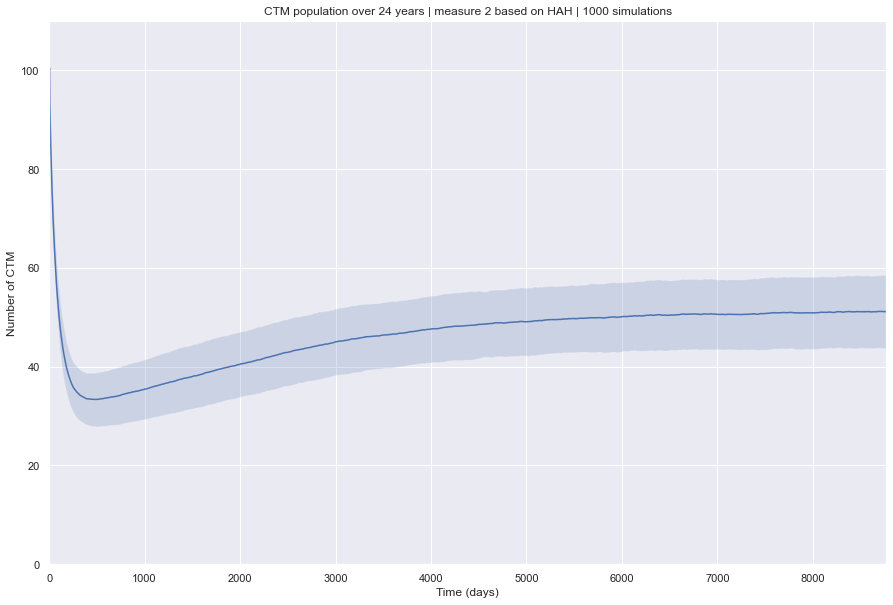

In [59]:
mean5 = df5.mean(axis=1)
std5 = df5.std(axis=1)
sns.set(rc={'figure.figsize':(15,10)})
plt.plot(mean5)
plt.fill_between(df5.index, mean5 + std5, mean5 - std5, alpha=0.2)
plt.axis([0,8766, 0, 110])
plt.title('CTM population over 24 years | measure 2 based on HAH | 1000 simulations')
plt.ylabel('Number of CTM')
plt.xlabel('Time (days)')

**Overview plot set 2**

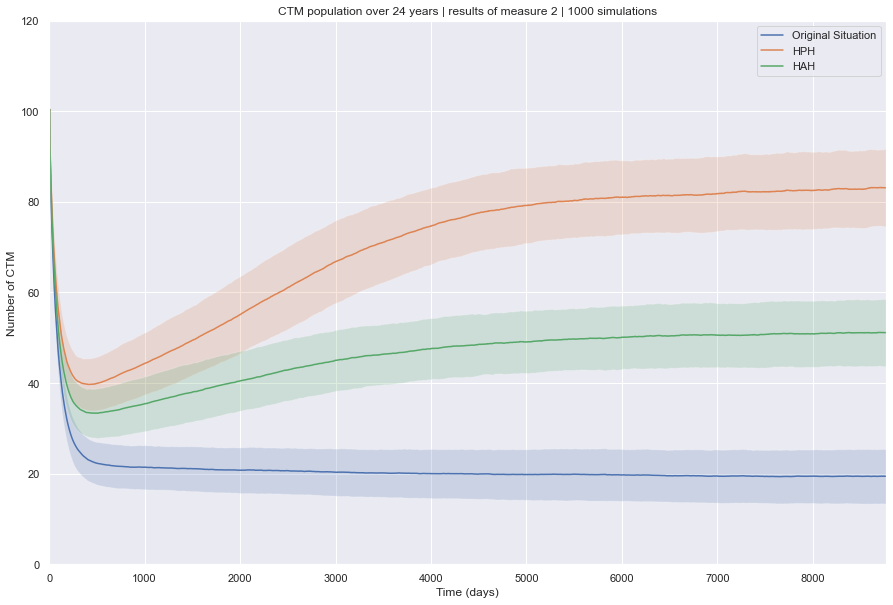

In [60]:
plt.plot(mean0, label='Original Situation')
plt.plot(mean4, label='HPH')
plt.plot(mean5, label='HAH')
plt.fill_between(df0.index, mean0 + std0, mean0 - std0, alpha=0.2)
plt.fill_between(df4.index, mean4 + std4, mean4 - std4, alpha=0.2)
plt.fill_between(df5.index, mean5 + std5, mean5 - std5, alpha=0.2)

plt.axis([0,8766, 0, 120])
plt.title('CTM population over 24 years | results of measure 2 | 1000 simulations')
plt.ylabel('Number of CTM')
plt.xlabel('Time (days)')
plt.legend()

**Paired t-test**

In [23]:
HPH = df4.iloc[-1]
HAH = df5.iloc[-1]

# is the population after HPH significantly greater than after HAH?
ttest1 = stats.ttest_rel(HPH, HAH, alternative='greater')
ttest1

Ttest_relResult(statistic=88.07699941522174, pvalue=0.0)

In [24]:
# is the population after HAH significantly greater in the original situation?
ttest2 = stats.ttest_rel(HAH, Original, alternative='greater')
ttest2

Ttest_relResult(statistic=105.48344333639861, pvalue=0.0)

In [25]:
# is the population after HPH significantly greater than in the original situation?
ttest2 = stats.ttest_rel(HPH, Original, alternative='greater')
ttest2

Ttest_relResult(statistic=190.9930705575618, pvalue=0.0)

**Test of sphericity**

In [26]:
# HPH vs HAH
df_stat1 = pd.Series(zip(mean4[1000:], mean5[1000:]))
df_stat1 = pd.DataFrame(df_stat1.values.tolist())
df_stat1 = df_stat1.stack().reset_index(drop=True)
df_stat1 = pd.DataFrame({'timestep': np.repeat(np.arange(0, 7766), 2), 'theory': np.tile(['HPH', 'HAH'], 7766), 'population': df_stat1})
pg.sphericity(df_stat1, dv='population', within='theory', subject='timestep')

(True, nan, nan, 1, 1.0)

In [27]:
# HAH vs Original
df_stat2 = pd.Series(zip(mean5[1000:], mean0[1000:]))
df_stat2 = pd.DataFrame(df_stat2.values.tolist())
df_stat2 = df_stat2.stack().reset_index(drop=True)
df_stat2 = pd.DataFrame({'timestep': np.repeat(np.arange(0, 7766), 2), 'theory': np.tile(['HAH', 'Original'], 7766), 'population': df_stat2})
pg.sphericity(df_stat2, dv='population', within='theory', subject='timestep')

(True, nan, nan, 1, 1.0)

In [28]:
# HPH vs Original
df_stat3 = pd.Series(zip(mean4[1000:], mean0[1000:]))
df_stat3 = pd.DataFrame(df_stat3.values.tolist())
df_stat3 = df_stat3.stack().reset_index(drop=True)
df_stat3 = pd.DataFrame({'timestep': np.repeat(np.arange(0, 7766), 2), 'theory': np.tile(['HPH', 'Original'], 7766), 'population': df_stat3})
pg.sphericity(df_stat3, dv='population', within='theory', subject='timestep')

(True, nan, nan, 1, 1.0)

**RMANOVA**

In [29]:
# HPH vs HAH
arm1 = AnovaRM(data=df_stat1, depvar='population', subject='timestep', within=['theory']).fit()
print(arm1)

                  Anova
         F Value   Num DF   Den DF  Pr > F
------------------------------------------
theory 102632.7106 1.0000 7765.0000 0.0000



In [30]:
# HAH vs Original
arm2 = AnovaRM(data=df_stat2, depvar='population', subject='timestep', within=['theory']).fit()
print(arm2)

                  Anova
         F Value   Num DF   Den DF  Pr > F
------------------------------------------
theory 230274.6576 1.0000 7765.0000 0.0000



In [31]:
# HPH vs Original
arm3 = AnovaRM(data=df_stat3, depvar='population', subject='timestep', within=['theory']).fit()
print(arm3)

                  Anova
         F Value   Num DF   Den DF  Pr > F
------------------------------------------
theory 149294.0816 1.0000 7765.0000 0.0000



**HPH measure 3**

In [32]:
df6 = pd.read_csv('HPH_Combi1.csv', skiprows=16)
df6 = df6.drop(labels='[all run data]', axis=1)
df6

,count monkeys,count monkeys.1,count monkeys.2,count monkeys.3,count monkeys.4,count monkeys.5,count monkeys.6,count monkeys.7,count monkeys.8,count monkeys.9,...,count monkeys.990,count monkeys.991,count monkeys.992,count monkeys.993,count monkeys.994,count monkeys.995,count monkeys.996,count monkeys.997,count monkeys.998,count monkeys.999
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,101,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,101,100,101,100,100,100,101,101,101,...,100,100,100,100,100,101,100,100,100,100
3,100,101,100,101,100,100,100,101,101,101,...,100,100,100,100,100,101,100,100,100,100
4,100,101,100,101,100,100,100,101,101,101,...,100,100,101,100,100,101,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,99,85,97,75,83,94,80,75,88,94,...,86,95,94,86,92,80,95,83,92,90
8762,99,85,97,75,83,94,80,75,87,94,...,86,95,94,86,92,80,95,83,92,90
8763,99,85,97,75,83,94,80,75,88,94,...,86,95,94,86,92,80,95,83,92,90
8764,99,85,97,75,83,94,80,75,88,94,...,86,96,94,86,92,80,95,82,92,90


Text(0.5, 0, 'Time (days)')

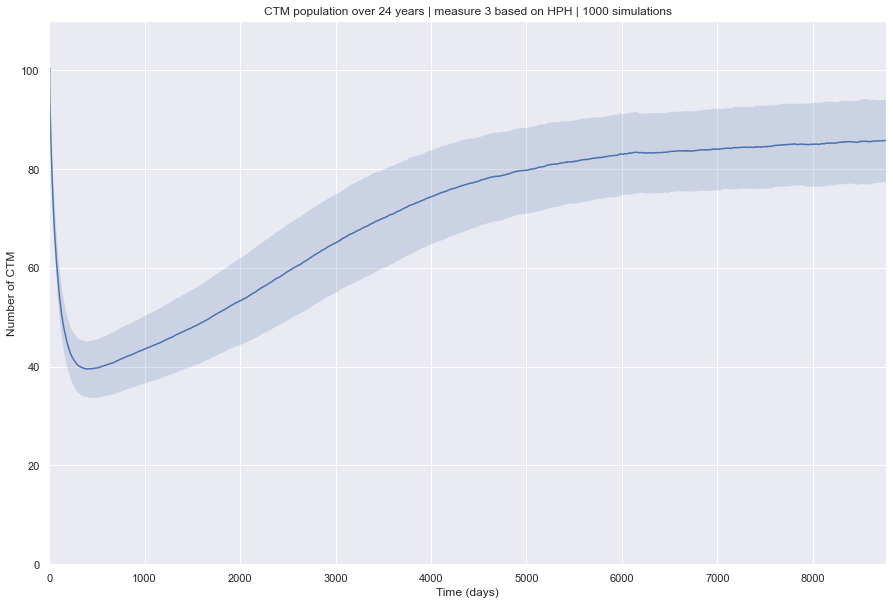

In [61]:
mean6 = df6.mean(axis=1)
std6 = df6.std(axis=1)
sns.set(rc={'figure.figsize':(15,10)})
plt.plot(mean6)
plt.fill_between(df6.index, mean6 + std6, mean6 - std6, alpha=0.2)
plt.axis([0,8766, 0, 110])
plt.title('CTM population over 24 years | measure 3 based on HPH | 1000 simulations')
plt.ylabel('Number of CTM')
plt.xlabel('Time (days)')

**HAH measure 3**

In [34]:
df7 = pd.read_csv('HAH_Combi1.csv', skiprows=16)
df7 = df7.drop(labels='[all run data]', axis=1)
df7

,count monkeys,count monkeys.1,count monkeys.2,count monkeys.3,count monkeys.4,count monkeys.5,count monkeys.6,count monkeys.7,count monkeys.8,count monkeys.9,...,count monkeys.990,count monkeys.991,count monkeys.992,count monkeys.993,count monkeys.994,count monkeys.995,count monkeys.996,count monkeys.997,count monkeys.998,count monkeys.999
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,101,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,101,100,100,101,100,100,100,...,100,100,100,100,100,100,100,101,100,100
3,100,100,100,101,100,100,101,100,100,100,...,100,101,100,100,100,100,100,101,100,100
4,100,100,100,101,100,100,101,100,100,100,...,100,101,100,100,100,100,100,101,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,45,71,53,52,48,50,33,43,48,40,...,37,41,52,48,65,37,50,43,47,58
8762,45,71,53,52,48,50,34,43,48,40,...,37,41,52,48,65,37,50,43,47,57
8763,45,71,53,52,48,50,35,43,48,40,...,37,41,53,48,65,37,50,42,47,57
8764,45,71,53,52,48,50,35,43,48,40,...,37,41,53,48,65,37,50,42,47,57


Text(0.5, 0, 'Time (days)')

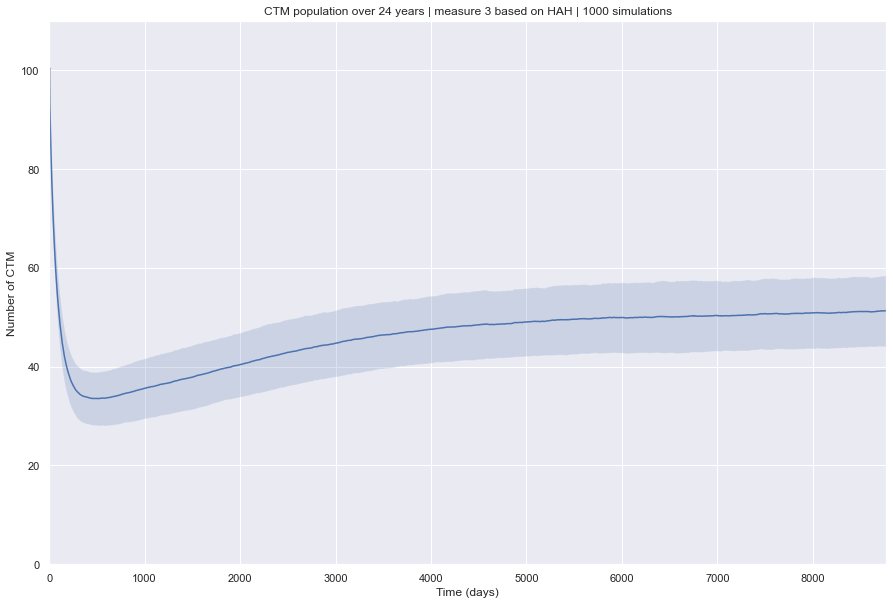

In [62]:
mean7 = df7.mean(axis=1)
std7 = df7.std(axis=1)
sns.set(rc={'figure.figsize':(15,10)})
plt.plot(mean7)
plt.fill_between(df7.index, mean7 + std7, mean7 - std7, alpha=0.2)
plt.axis([0,8766, 0, 110])
plt.title('CTM population over 24 years | measure 3 based on HAH | 1000 simulations')
plt.ylabel('Number of CTM')
plt.xlabel('Time (days)')

**Overview measure set 3**

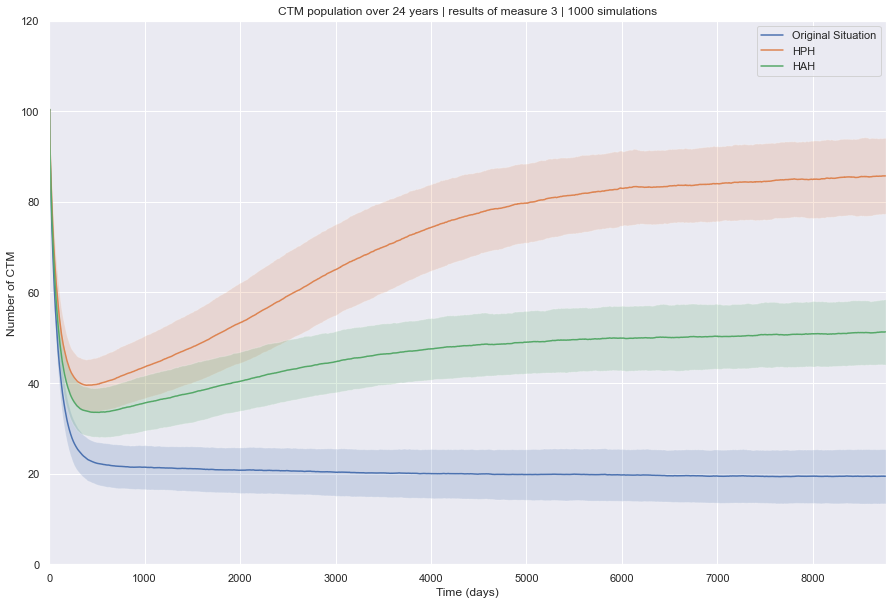

In [63]:
plt.plot(mean0, label='Original Situation')
plt.plot(mean6, label='HPH')
plt.plot(mean7, label='HAH')
plt.fill_between(df0.index, mean0 + std0, mean0 - std0, alpha=0.2)
plt.fill_between(df6.index, mean6 + std6, mean6 - std6, alpha=0.2)
plt.fill_between(df7.index, mean7 + std7, mean7 - std7, alpha=0.2)

plt.axis([0,8766, 0, 120])
plt.title('CTM population over 24 years | results of measure 3 | 1000 simulations')
plt.ylabel('Number of CTM')
plt.xlabel('Time (days)')
plt.legend()

**Paired t-test**

In [37]:
HPH = df6.iloc[-1]
HAH = df7.iloc[-1]

# is the population after HPH significantly greater than after HAH?
ttest1 = stats.ttest_rel(HPH, HAH, alternative='greater')
ttest1

Ttest_relResult(statistic=97.29046274919828, pvalue=0.0)

In [38]:
# is the population after HAH significantly greater than in the original situation?
ttest2 = stats.ttest_rel(HAH, Original, alternative='greater')
ttest2

Ttest_relResult(statistic=106.80569001490144, pvalue=0.0)

In [39]:
# is the population after HPH significantly greater than in the original situation?
ttest3 = stats.ttest_rel(HPH, Original, alternative='greater')
ttest3

Ttest_relResult(statistic=202.90052477332856, pvalue=0.0)

**Test of sphericity**

In [40]:
# HPH vs HAH
df_stat1 = pd.Series(zip(mean6[1000:], mean7[1000:]))
df_stat1 = pd.DataFrame(df_stat1.values.tolist())
df_stat1 = df_stat1.stack().reset_index(drop=True)
df_stat1 = pd.DataFrame({'timestep': np.repeat(np.arange(0, 7766), 2), 'theory': np.tile(['HPH', 'HAH'], 7766), 'population': df_stat1})
pg.sphericity(df_stat1, dv='population', within='theory', subject='timestep')

(True, nan, nan, 1, 1.0)

In [41]:
# HAH vs Original
df_stat2 = pd.Series(zip(mean7[1000:], mean0[1000:]))
df_stat2 = pd.DataFrame(df_stat2.values.tolist())
df_stat2 = df_stat2.stack().reset_index(drop=True)
df_stat2 = pd.DataFrame({'timestep': np.repeat(np.arange(0, 7766), 2), 'theory': np.tile(['HAH', 'Original'], 7766), 'population': df_stat2})
pg.sphericity(df_stat2, dv='population', within='theory', subject='timestep')

(True, nan, nan, 1, 1.0)

In [42]:
# HPH vs Original
df_stat3 = pd.Series(zip(mean6[1000:], mean0[1000:]))
df_stat3 = pd.DataFrame(df_stat3.values.tolist())
df_stat3 = df_stat3.stack().reset_index(drop=True)
df_stat3 = pd.DataFrame({'timestep': np.repeat(np.arange(0, 7766), 2), 'theory': np.tile(['HPH', 'Original'], 7766), 'population': df_stat3})
pg.sphericity(df_stat3, dv='population', within='theory', subject='timestep')

(True, nan, nan, 1, 1.0)

**RMANOVA**

In [43]:
# HPH vs HAH
arm1 = AnovaRM(data=df_stat1, depvar='population', subject='timestep', within=['theory']).fit()
print(arm1)

                  Anova
        F Value   Num DF   Den DF  Pr > F
-----------------------------------------
theory 73033.5441 1.0000 7765.0000 0.0000



In [44]:
# HAH vs Original
arm2 = AnovaRM(data=df_stat2, depvar='population', subject='timestep', within=['theory']).fit()
print(arm2)

                  Anova
         F Value   Num DF   Den DF  Pr > F
------------------------------------------
theory 232941.5115 1.0000 7765.0000 0.0000



In [45]:
# HPH vs Original
arm3 = AnovaRM(data=df_stat3, depvar='population', subject='timestep', within=['theory']).fit()
print(arm3)

                  Anova
         F Value   Num DF   Den DF  Pr > F
------------------------------------------
theory 121195.7512 1.0000 7765.0000 0.0000



**Baseline**

In [46]:
df8 = pd.read_csv('baseline.csv', skiprows=16)
df8 = df8.drop(labels='[all run data]', axis=1)
df8

,count monkeys,count monkeys.1,count monkeys.2,count monkeys.3,count monkeys.4,count monkeys.5,count monkeys.6,count monkeys.7,count monkeys.8,count monkeys.9,...,count monkeys.990,count monkeys.991,count monkeys.992,count monkeys.993,count monkeys.994,count monkeys.995,count monkeys.996,count monkeys.997,count monkeys.998,count monkeys.999
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,101,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,100,100,100,...,100,100,101,100,100,100,100,100,100,101
3,100,100,100,100,100,101,100,100,100,100,...,100,100,101,101,101,100,100,100,100,101
4,100,100,100,100,100,101,100,100,100,100,...,100,100,101,101,101,100,101,100,100,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,67,60,57,51,46,50,53,51,53,49,...,54,47,63,42,41,51,45,47,73,48
8762,67,60,57,51,46,50,53,51,53,49,...,55,47,63,42,41,51,45,47,73,48
8763,67,60,57,51,46,50,53,50,53,49,...,55,47,63,42,41,51,45,47,73,48
8764,67,59,57,51,46,50,53,49,53,49,...,55,47,63,42,41,51,45,47,73,48


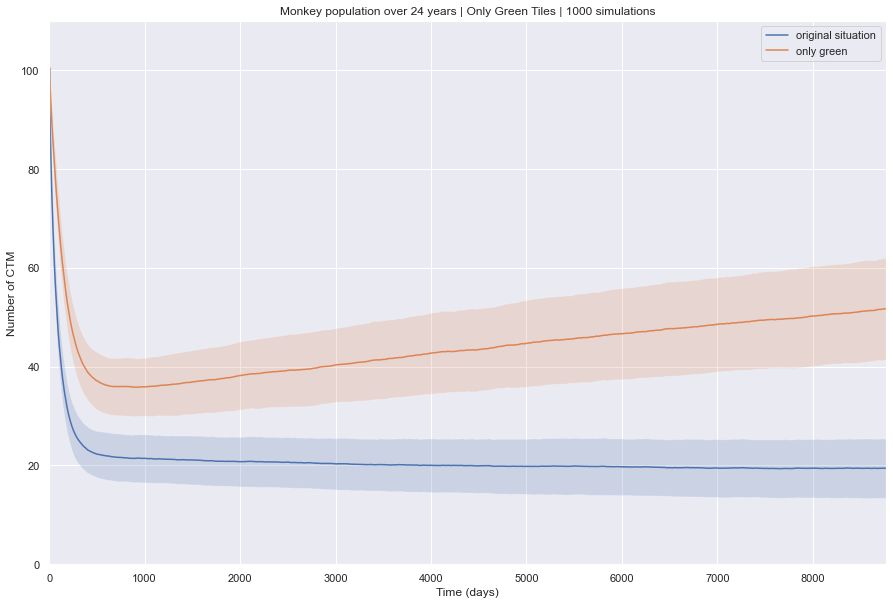

In [64]:
mean8 = df8.mean(axis=1)
std8 = df8.std(axis=1)
sns.set(rc={'figure.figsize':(15,10)})
plt.plot(mean0, label='original situation')
plt.plot(mean8, label='only green')
plt.fill_between(df0.index, mean0 + std0, mean0 - std0, alpha=0.2)
plt.fill_between(df8.index, mean8 + std8, mean8 - std8, alpha=0.2)
plt.axis([0,8766, 0, 110])
plt.title('Monkey population over 24 years | Only Green Tiles | 1000 simulations')
plt.ylabel('Number of CTM')
plt.xlabel('Time (days)')
plt.legend()

**Reserves**

In [48]:
df9 = pd.read_csv('reserves.csv', skiprows=16)
df9 = df9.drop(labels='[all run data]', axis=1)
df9

,count monkeys,count monkeys.1,count monkeys.2,count monkeys.3,count monkeys.4,count monkeys.5,count monkeys.6,count monkeys.7,count monkeys.8,count monkeys.9,...,count monkeys.990,count monkeys.991,count monkeys.992,count monkeys.993,count monkeys.994,count monkeys.995,count monkeys.996,count monkeys.997,count monkeys.998,count monkeys.999
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,101,100,100,101,100,100
3,100,100,100,100,100,100,100,100,101,100,...,100,100,100,100,101,100,100,101,100,100
4,100,101,100,100,100,100,100,100,101,100,...,100,100,100,100,101,100,100,101,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,10,17,25,21,40,17,15,29,23,32,...,29,28,23,40,28,15,16,35,23,22
8762,10,17,25,21,40,17,15,29,23,32,...,29,28,23,40,28,15,16,35,23,22
8763,10,17,25,21,40,17,15,28,23,32,...,29,28,23,40,28,15,16,35,23,22
8764,10,17,25,21,40,17,15,28,23,32,...,29,28,23,40,28,15,16,35,23,22


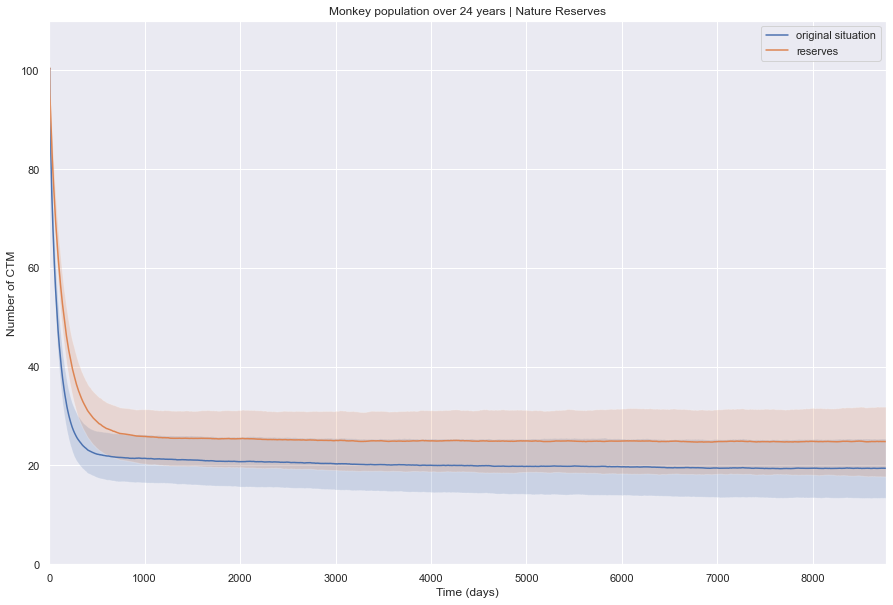

In [66]:
mean9 = df9.mean(axis=1)
std9 = df9.std(axis=1)
sns.set(rc={'figure.figsize':(15,10)})
plt.plot(mean0, label='original situation')
plt.plot(mean9, label='reserves')
plt.fill_between(df0.index, mean0 + std0, mean0 - std0, alpha=0.2)
plt.fill_between(df9.index, mean9 + std9, mean9 - std9, alpha=0.2)
plt.axis([0,8766, 0, 110])
plt.title('Monkey population over 24 years | Nature Reserves')
plt.ylabel('Number of CTM')
plt.xlabel('Time (days)')
plt.legend()

**All plots together**

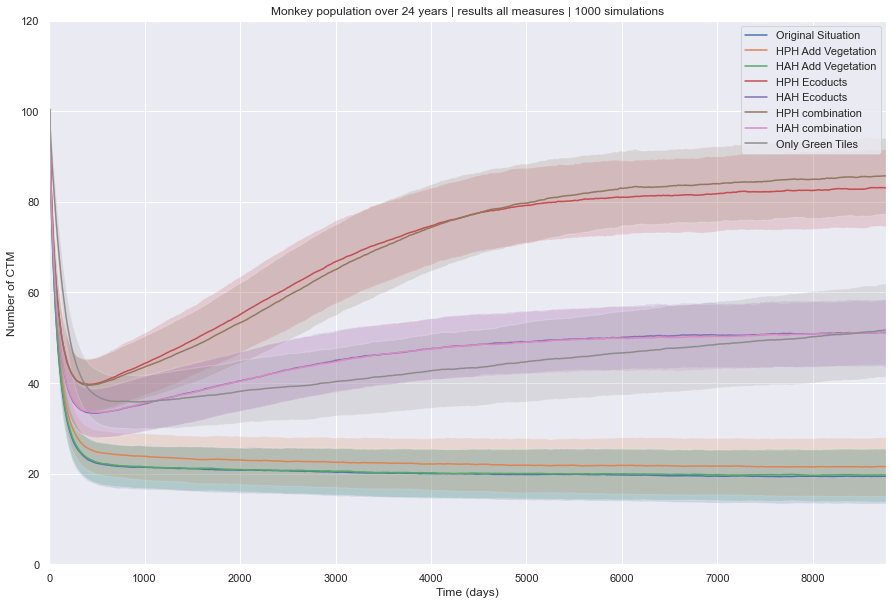

In [68]:
plt.plot(mean0, label='Original Situation')
plt.plot(mean1, label='HPH Add Vegetation')
plt.plot(mean2, label='HAH Add Vegetation')
plt.plot(mean4, label='HPH Ecoducts')
plt.plot(mean5, label='HAH Ecoducts')
plt.plot(mean6, label='HPH combination')
plt.plot(mean7, label='HAH combination')
plt.plot(mean8, label='Only Green Tiles')

plt.fill_between(df0.index, mean0 + std0, mean0 - std0, alpha=0.2)
plt.fill_between(df1.index, mean1 + std1, mean1 - std1, alpha=0.2)
plt.fill_between(df2.index, mean2 + std2, mean2 - std2, alpha=0.2)
plt.fill_between(df4.index, mean4 + std4, mean4 - std4, alpha=0.2)
plt.fill_between(df5.index, mean5 + std5, mean5 - std5, alpha=0.2)
plt.fill_between(df6.index, mean6 + std6, mean6 - std6, alpha=0.2)
plt.fill_between(df7.index, mean7 + std7, mean7 - std7, alpha=0.2)
plt.fill_between(df8.index, mean8 + std8, mean8 - std8, alpha=0.2)

plt.axis([0,8766, 0, 120])
plt.title('Monkey population over 24 years | results all measures | 1000 simulations')
plt.ylabel('Number of CTM')
plt.xlabel('Time (days)')
plt.legend()

**100 years baseline vs HPH combi**

In [51]:
df10 = pd.read_csv('Baseline100y.csv', skiprows=16)
df10 = df10.drop(labels='[all run data]', axis=1)
df10

,count monkeys,count monkeys.1,count monkeys.2,count monkeys.3,count monkeys.4,count monkeys.5,count monkeys.6,count monkeys.7,count monkeys.8,count monkeys.9,...,count monkeys.90,count monkeys.91,count monkeys.92,count monkeys.93,count monkeys.94,count monkeys.95,count monkeys.96,count monkeys.97,count monkeys.98,count monkeys.99
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,101,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,100,100,101,...,101,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,101,...,101,100,100,100,101,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,101,...,101,100,100,100,101,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36520,67,65,81,67,65,79,67,68,70,93,...,71,68,52,55,66,74,86,53,55,62
36521,67,65,81,67,65,79,67,68,70,93,...,72,68,52,55,66,74,86,53,55,62
36522,67,66,81,67,65,79,67,68,70,93,...,72,68,52,55,66,74,86,53,55,61
36523,67,65,81,67,65,79,67,68,70,93,...,73,68,52,55,65,74,86,53,55,61


In [52]:
df11 = pd.read_csv('HPH_Combi100y.csv', skiprows=16)
df11 = df11.drop(labels='[all run data]', axis=1)
df11

,count monkeys,count monkeys.1,count monkeys.2,count monkeys.3,count monkeys.4,count monkeys.5,count monkeys.6,count monkeys.7,count monkeys.8,count monkeys.9,...,count monkeys.90,count monkeys.91,count monkeys.92,count monkeys.93,count monkeys.94,count monkeys.95,count monkeys.96,count monkeys.97,count monkeys.98,count monkeys.99
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,101,100,100,100,100,...,100,100,100,100,100,100,101,100,100,100
3,100,100,100,100,100,101,100,100,100,100,...,100,100,100,100,100,100,101,100,100,100
4,100,100,100,100,100,101,100,100,100,100,...,100,100,100,100,100,100,101,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36520,91,87,83,86,81,85,65,66,75,84,...,93,100,89,90,81,87,87,93,81,84
36521,91,87,83,86,81,85,65,66,75,84,...,92,100,89,90,81,87,87,93,81,84
36522,92,87,83,86,81,85,65,66,75,84,...,92,100,88,90,81,87,87,93,81,84
36523,92,87,83,86,81,85,65,66,75,85,...,92,100,88,90,81,87,87,93,81,84


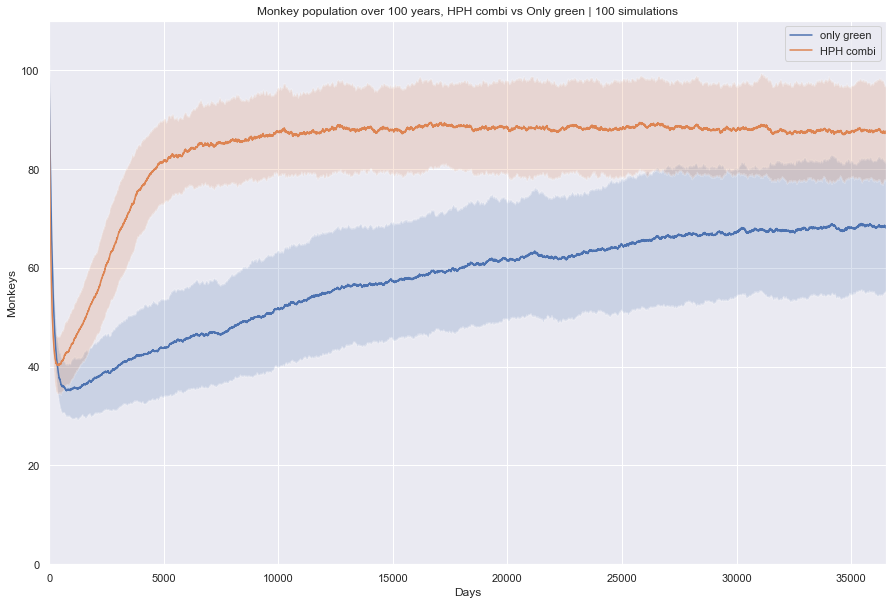

In [53]:
mean10 = df10.mean(axis=1)
std10 = df10.std(axis=1)
mean11 = df11.mean(axis=1)
std11 = df11.std(axis=1)
sns.set(rc={'figure.figsize':(15,10)})
plt.plot(mean10, label='only green')
plt.plot(mean11, label='HPH combi')
plt.fill_between(df10.index, mean10 + std10, mean10 - std10, alpha=0.2)
plt.fill_between(df11.index, mean11 + std11, mean11 - std11, alpha=0.2)
plt.axis([0,36525, 0, 110])
plt.title('Monkey population over 100 years, HPH combi vs Only green | 100 simulations' )
plt.ylabel('Monkeys')
plt.xlabel('Days')
plt.legend()